In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [2]:
#so all DataFrame data is displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

In [83]:
zri = pd.read_csv('./data/df4.csv', index_col = 0)

/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,7,8,9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [84]:
zri.head()

,ZIPCODE,value,Month,Year,total_pop,City,State,Metro,CountyName,SizeRank,Year-Month,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,FIPSCode,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,geo_id,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,housing_units_renter_occupied,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,rental_units_supply,year,population_change,income_change,supply_change,natural_amenity_rank
0,60657,1723.0,1,2019.0,70052.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77494,1255.0,1,2019.0,114989.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60614,1872.0,1,2019.0,71308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77084,1326.0,1,2019.0,107700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,79936,898.0,1,2019.0,112355.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
zipcodes = [12010, 13021, 90201, 91770, 91732, 90706, 91733, 12078]
dropzips= zri[zri.ZIPCODE.isin(zipcodes)==True]
dz = dropzips.groupby(['Year', 'ZIPCODE']).agg({'value':'mean'}).reset_index()
dz = dz.pivot(index='Year', columns='ZIPCODE', values='value')

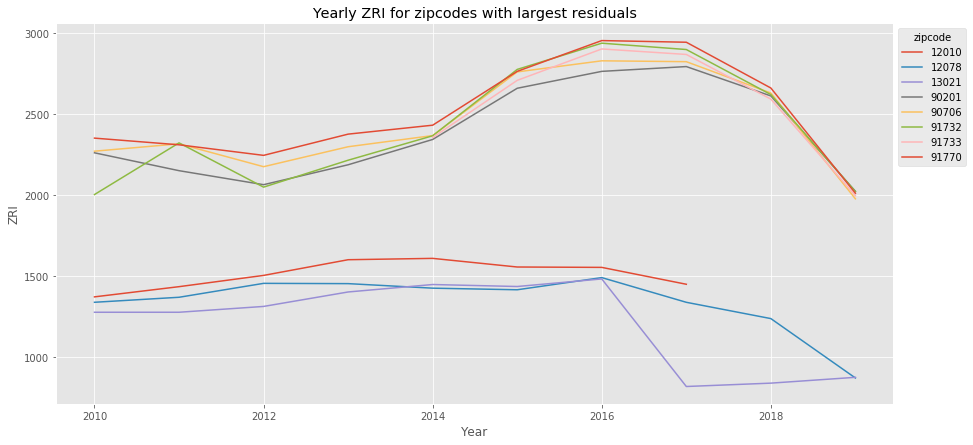

In [86]:
dz.plot(figsize = (15,7)).legend(title='zipcode', bbox_to_anchor=(1, 1))
plt.title('Yearly ZRI for zipcodes with largest residuals')
plt.ylabel('ZRI')
plt.rcParams.update({'font.size': 10})
plt.savefig('YearlyZRIzipcodes.png')

In [87]:
dz2 = dropzips.groupby(['Year', 'ZIPCODE']).agg({'value':'mean', 'total_pop': 'mean', 'rental_units_supply':'mean', 'Labor\nForce':'mean', 'TotIncome':'mean'}).reset_index()


In [25]:
dz2 = dz2[dz2.Year > 2010]
dz2 = dz2[dz2.Year < 2019]

In [93]:
dropzips.Month.value_counts().plot()

NameError: name 'bar' is not defined

In [27]:
dz2.head()

,Year,ZIPCODE,value,total_pop,rental_units_supply,Labor\nForce,TotIncome
7,2011.0,12010,1434.500000,29192.0,4594.0,0.875308,59419.500000
8,2011.0,12078,1369.125000,23887.0,4179.0,1.069703,39809.166667
9,2011.0,13021,1276.750000,39125.0,6944.0,0.998543,97058.333333
10,2011.0,90201,2149.583333,101584.0,19184.0,48.516144,61188.833333
11,2011.0,90706,2315.166667,76243.0,15428.0,64.641528,114552.500000


In [130]:
df = dz2[dz2.ZIPCODE == 12010]

In [136]:
df

,value,total_pop,rental_units_supply,Labor\nForce,TotIncome
Year,,,,,
2010.0,1371.666667,NaN,NaN,NaN,NaN
2011.0,1434.500000,29192.0,4594.0,0.875308,59419.500000
2012.0,1503.909091,28711.0,4521.0,0.884400,60437.500000
2013.0,1600.666667,28802.0,4654.0,0.858829,101280.666667
2014.0,1608.916667,28926.0,4688.0,0.809998,104505.166667
2015.0,1555.727273,28793.0,4555.0,0.814260,107780.000000
2016.0,1553.375000,28787.0,4618.0,0.806579,109000.166667
2017.0,1449.333333,28704.0,4172.0,0.806787,114114.666667
2019.0,862.250000,NaN,NaN,NaN,NaN


In [131]:
df.drop(columns = 'ZIPCODE', inplace=True)

/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [132]:
df = df.set_index('Year')

In [133]:
#normalized_df=(z90201-z90201.mean())/z90201.std()

In [134]:
normalized_df=(df-df.min())/(df.max()-df.min())

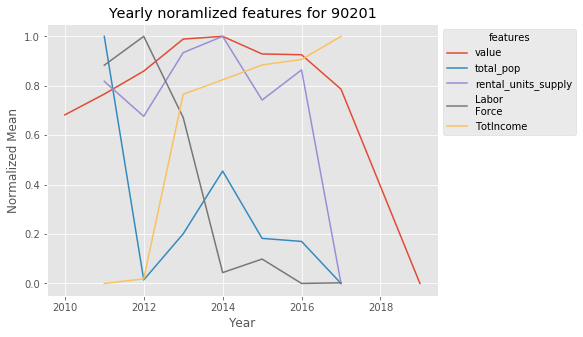

In [135]:
normalized_df.plot(figsize = (7,5)).legend(title='features', bbox_to_anchor=(1, 1))
plt.title('Yearly noramlized features for 90201')
plt.ylabel('Normalized Mean')
plt.show()

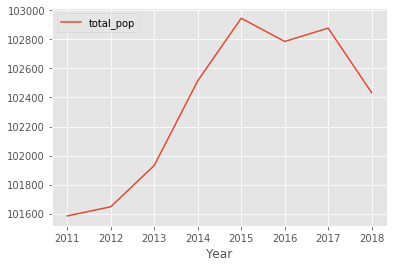

In [100]:
z90201.groupby('Year').agg({'total_pop':'mean'}).plot()

In [116]:
zipcodes = [90201, 91770, 91732, 90706, 91733]
dropzips= zri[zri.ZIPCODE.isin(zipcodes)==True]
dz = dropzips.groupby(['Year', 'ZIPCODE']).agg({'rental_units_supply':'mean'}).reset_index()
dz = dz.pivot(index='Year', columns='ZIPCODE', values='rental_units_supply')

In [117]:
dz=(dz-dz.min())/(dz.max()-dz.min())

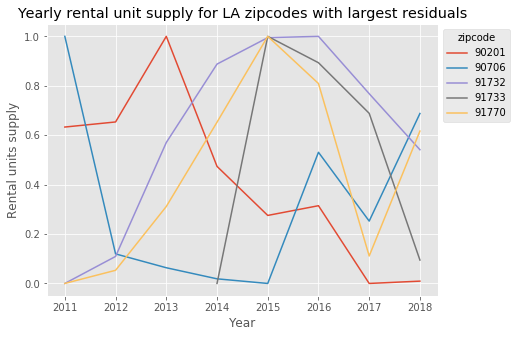

In [129]:
dz.plot(figsize = (7,5)).legend(title='zipcode', bbox_to_anchor=(1, 1))
plt.title('Yearly rental unit supply for LA zipcodes with largest residuals')
plt.ylabel('Rental units supply')
plt.rcParams.update({'font.size': 10})
plt.savefig('YearlyZRIzipcodes.png')